- [A Beginner's Guide to Machine Learning Algorithms](https://acethecloud.com/blog/machine-learning-algorithms/?src=linked.com)

In [1]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.labelsize'] = 14

1. Linear Regression.

Linear regression is a machine learning algorithm that is used for predicting a continuous target variable based on one or more explanatory variables. It is based on the idea of finding a linear relationship between the explanatory variables and the target variable.

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np

# create some sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 4, 5])

# create a linear regression model
model = LinearRegression()

# fit the model to the data
model.fit(X, y)

#predict the target variable from a new data point
prediction = model.predict(np.array([[6]]))
print(prediction)

[6.]


2. Logistic Regression

Logistic regression is a type of classification algorithm that is used to predict a binary outcome, such as “yes” or “no,” “0” or “1,” or “true” or “false.” It is based on the logistic function, which maps a continuous input to a value between 0 and 1.

[link](https://realpython.com/logistic-regression-python/)

model classes:  [0 1]
model intercept:  [-0.81734944]
model coef:  [[0.46989103]]
model prediction probability: 
 [[0.05012651 0.94987349]
 [0.58600111 0.41399889]]
model prediction:  [1 0]
Accuracy: 1.0
confution matrix:
 [[1 0]
 [0 1]]


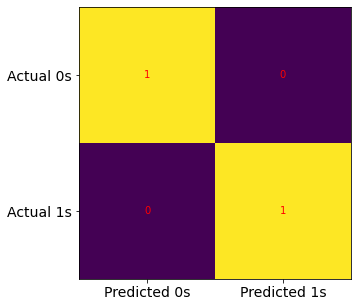

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# create some sample data
X = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a logistic regression model
model = LogisticRegression(solver="liblinear", C=1.0, random_state=0)

# fit the model to the training data
model.fit(X_train, y_train)

print("model classes: ", model.classes_)
print("model intercept: ", model.intercept_)
print("model coef: ", model.coef_)
print("model prediction probability: \n", model.predict_proba(X_test))

# make predictions on the test data
y_pred = model.predict(X_test)
print("model prediction: ", y_pred)

# evaluate the model performance
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, y_pred))
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
print("confution matrix:\n", cm)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')


In [4]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [5]:
# Example 2: this problem is not linearly separable

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
model = LogisticRegression(solver="liblinear", C=10.0, random_state=0)
model.fit(x, y)

p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

print("score:", score_)
print("prediction:\n", y_pred)
print("confusion matrix:\n", conf_m)
print("classification report:\n", report)
print("prediction probability:\n", p_pred)



score: 0.8
prediction:
 [0 0 0 1 1 1 1 1 1 1]
confusion matrix:
 [[2 1]
 [1 6]]
classification report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10

prediction probability:
 [[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]


Logistic Regression in Python: Handwriting Recognition

In [6]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [7]:
x, y = load_digits(return_X_y=True)
x.shape, y.shape, set(y)

((1797, 64), (1797,), {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

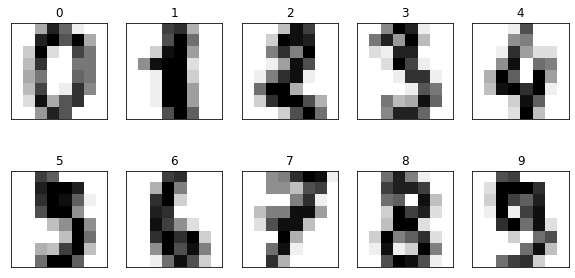

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(x[i].reshape(8, 8), cmap='binary')
    axi.set(xticks=[], yticks=[], title=y[i])


In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

model = LogisticRegression(solver="liblinear",
                           C=0.05,
                           multi_class="ovr",
                           random_state=0).fit(x_train, y_train)

# When you’re working with problems with more than two classes, 
# you should specify the multi_class parameter of LogisticRegression. 
# It determines how to solve the problem:
# 'ovr' says to make the binary fit for each class.

# model evaluation
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)
print("accuracy train: {:.4f}".format(model.score(x_train, y_train)))
print("accuracy test : {:.4f}".format(model.score(x_test, y_test)))


(1437, 64) (360, 64) (1437,) (360,)
accuracy train: 0.9645
accuracy test : 0.9417


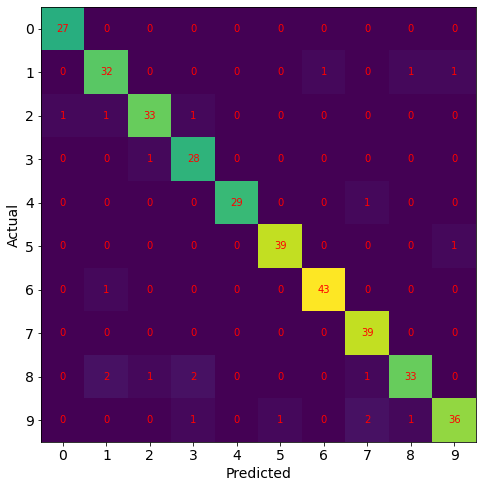

In [17]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

